### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 

For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

In [51]:
# Import packages
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches

In [3]:
# Import data
df0 = pd.read_csv("./HR_comma_sep.csv")

## Step 2. Data Exploration (Initial EDA and data cleaning)

In [4]:
# Gather basic information about the data
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [5]:
# Gather descriptive statistics about the data
df0.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [6]:
# Rename columns 
df0 = df0.rename(columns={'Work_accident': 'work_accident', 'promotion_last_5years': 'promotion_last_5_years', 'Department': 'department'})

df0.head(0)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5_years,department,salary


In [7]:
# Check for missing values
df0.isnull().sum()

satisfaction_level        0
last_evaluation           0
number_project            0
average_montly_hours      0
time_spend_company        0
work_accident             0
left                      0
promotion_last_5_years    0
department                0
salary                    0
dtype: int64

In [8]:
# Check for duplicates
duplicates = df0.duplicated()

print(duplicates.value_counts())

print(duplicates)

False    11991
True      3008
Name: count, dtype: int64
0        False
1        False
2        False
3        False
4        False
         ...  
14994     True
14995     True
14996     True
14997     True
14998     True
Length: 14999, dtype: bool


In [9]:
# Drop duplicates and save resulting dataframe in a new variable
df1 = df0.drop_duplicates()

# Display first few rows of new dataframe as needed
df1.tail(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5_years,department,salary
11995,0.90,0.55,3,259,10,1,0,1,management,high
11996,0.74,0.95,5,266,10,0,0,1,management,high
11997,0.85,0.54,3,185,10,0,0,1,management,high
11998,0.33,0.65,3,172,10,0,0,1,marketing,high
11999,0.50,0.73,4,180,3,0,0,0,IT,low


# Analyze Stage



### New features

* **department_salary_level**: Represents the average salary level for each department.
* **workload_pressure**: Indicates how much work is required per project, which might relate to stress.
* **department_salary_level**: Gives a sense of how competitive an employee's salary is within their department.

In [55]:
# Ensure you're working with a copy, not a view
df1 = df1.copy()

# Workload Pressure
df1['workload_pressure'] = df1['average_montly_hours'] / df1['number_project']

# Average Tenure for Department
department_avg_tenure = df1.groupby('department')['time_spend_company'].transform('mean')
df1['tenure_vs_avg'] = df1['time_spend_company'] - department_avg_tenure

# Department Salary Level
salary_map = {'low': 1, 'medium': 2, 'high': 3}
df1['salary_num'] = df1['salary'].map(salary_map)
df1['department_salary_level'] = df1.groupby('department')['salary_num'].transform('mean')

# Display the DataFrame with new features
df1.head()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5_years,department,salary,workload_pressure,tenure_vs_avg,salary_num,department_salary_level
0,0.38,0.53,2,157,3,0,1,0,sales,low,78.500000,-0.380673,1,1.593702
1,0.80,0.86,5,262,6,0,1,0,sales,medium,52.400000,2.619327,2,1.593702
2,0.11,0.88,7,272,4,0,1,0,sales,medium,38.857143,0.619327,2,1.593702
3,0.72,0.87,5,223,5,0,1,0,sales,low,44.600000,1.619327,1,1.593702
4,0.37,0.52,2,159,3,0,1,0,sales,low,79.500000,-0.380673,1,1.593702


### Data visualizations

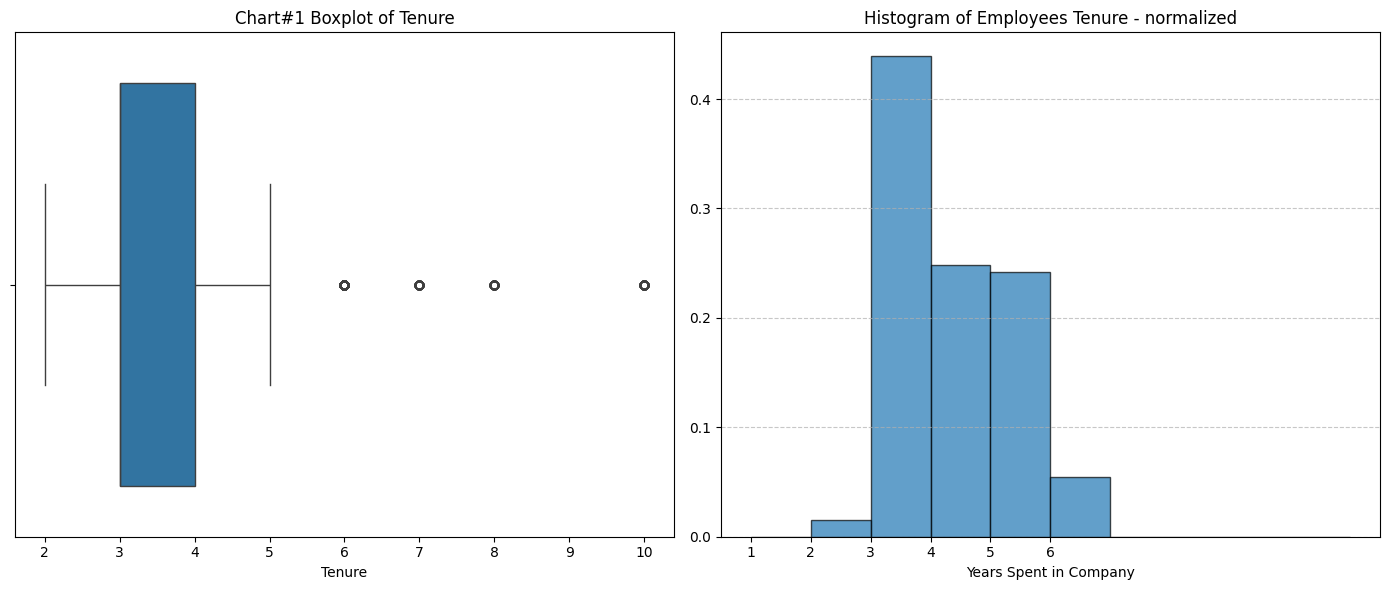

In [30]:
# Create a figure with two subplots side by side
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# Chart#1: Boxplot of Tenure
sns.boxplot(x=df1['time_spend_company'], ax=axes[0])
axes[0].set_title('Chart#1 Boxplot of Tenure')
axes[0].set_xlabel('Tenure')

# Chart#2: Histogram of Employees Tenure (normalized)
left_employees = df1[df1['left'] == 1]
axes[1].hist(left_employees['time_spend_company'], bins=range(1, df1['time_spend_company'].max() + 2), 
             edgecolor='black', alpha=0.7, density=True)
axes[1].set_title('Histogram of Employees Tenure - normalized')
axes[1].set_xlabel('Years Spent in Company')
axes[1].set_xticks(range(1, left_employees['time_spend_company'].max() + 1))
axes[1].grid(axis='y', linestyle='--', alpha=0.7)


plt.tight_layout()

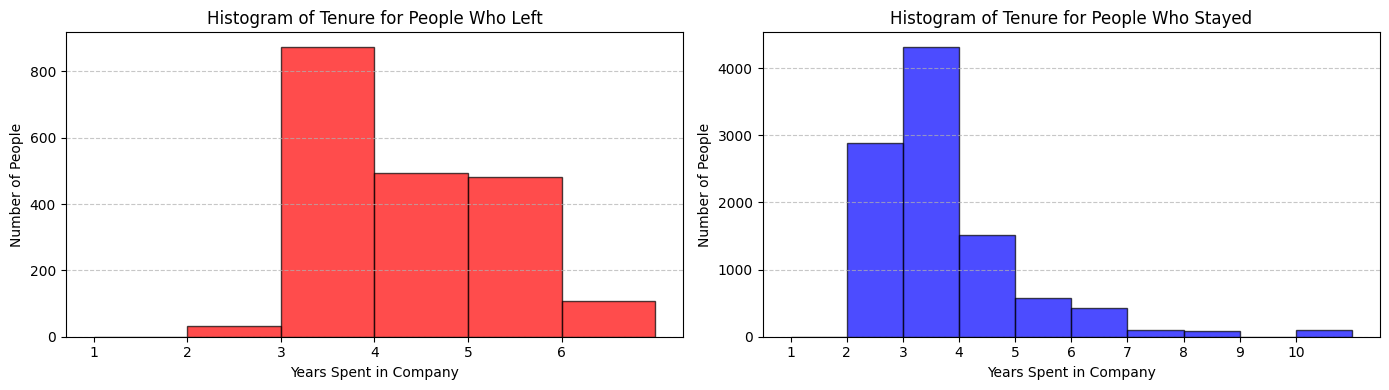

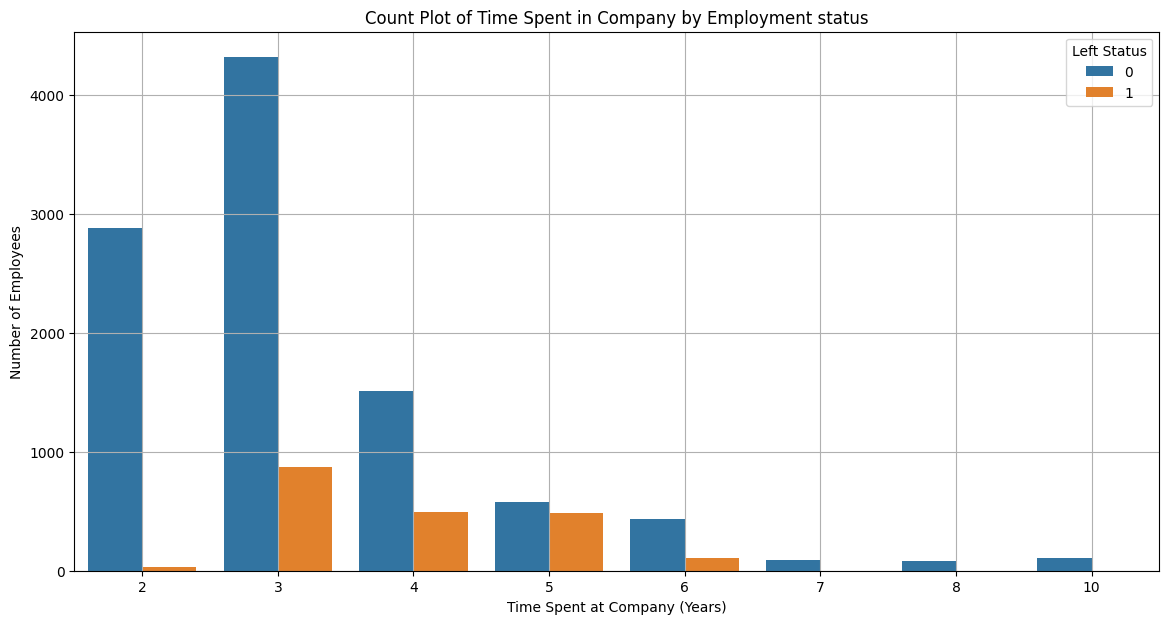

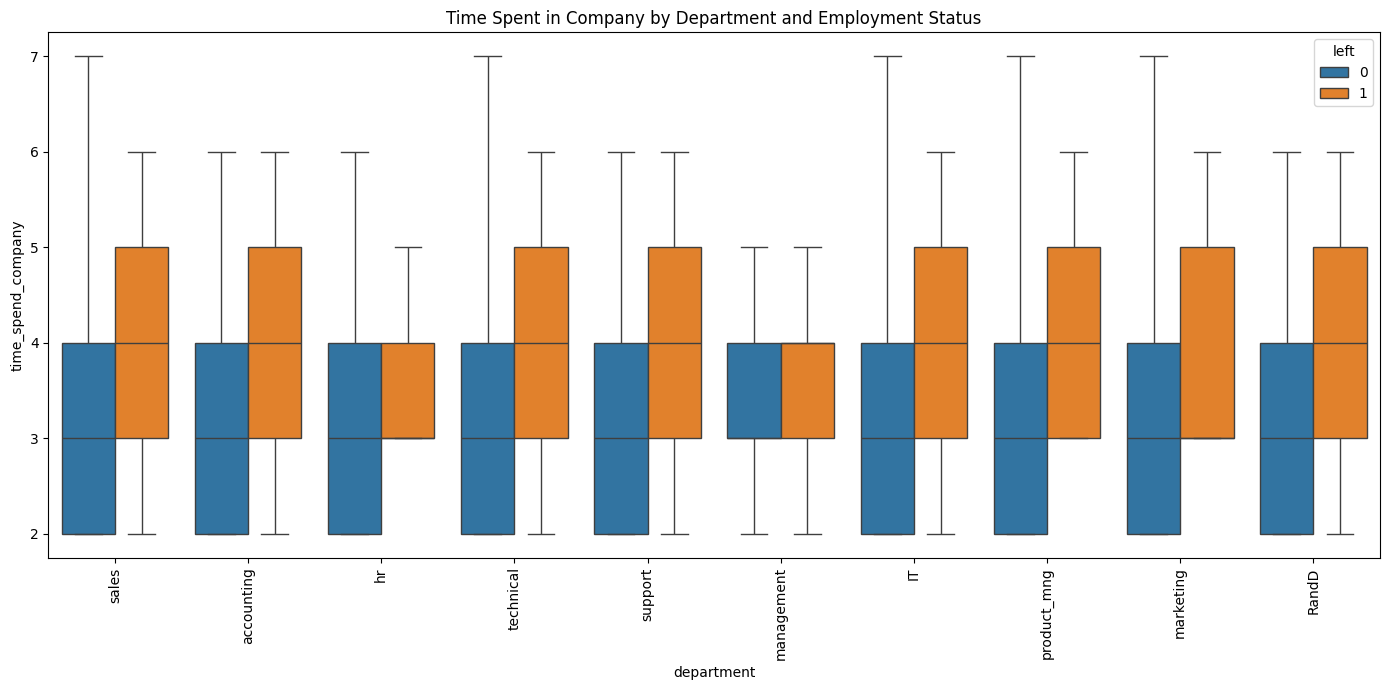

In [41]:
# Filter data for people who left and stayed
left_employees = df1[df1['left'] == 1]
stayed_employees = df1[df1['left'] == 0]

# Create histograms
plt.figure(figsize=(14, 4))

# Histogram for people who left
plt.subplot(1, 2, 1)
plt.hist(left_employees['time_spend_company'], bins=range(1, left_employees['time_spend_company'].max() + 2), color='red', edgecolor='black', alpha=0.7)
plt.title('Histogram of Tenure for People Who Left')
plt.xlabel('Years Spent in Company')
plt.ylabel('Number of People')
plt.xticks(range(1, left_employees['time_spend_company'].max() + 1))
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Histogram for people who stayed
plt.subplot(1, 2, 2)
plt.hist(stayed_employees['time_spend_company'], bins=range(1, stayed_employees['time_spend_company'].max() + 2), color='blue', edgecolor='black', alpha=0.7)
plt.title('Histogram of Tenure for People Who Stayed')
plt.xlabel('Years Spent in Company')
plt.ylabel('Number of People')
plt.xticks(range(1, stayed_employees['time_spend_company'].max() + 1))
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


plt.figure(figsize=(14, 7))

# Count plot
sns.countplot(x='time_spend_company', hue='left', data=df1)
plt.title('Count Plot of Time Spent in Company by Employment status')
plt.xlabel('Time Spent at Company (Years)')
plt.ylabel('Number of Employees')
plt.legend(title='Left Status')

plt.grid(True)
plt.show()


# Create boxplots for department vs. left and salary vs. left
plt.figure(figsize=(14, 7))

# Boxplot for department vs. Stayed/left
sns.boxplot(x='department', y='time_spend_company', hue='left', data=df1,  showfliers=False)
plt.title('Time Spent in Company by Department and Employment Status')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

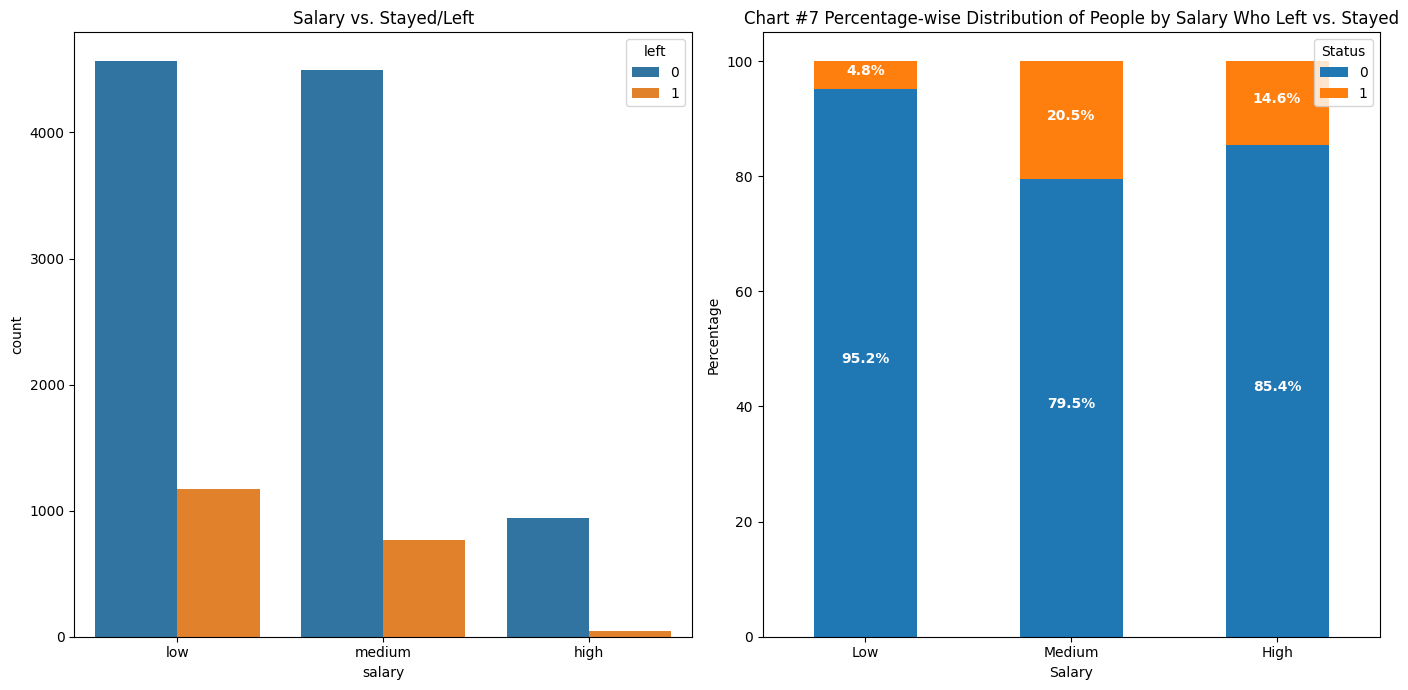

In [44]:
# Calculate percentage distribution for salary vs. left/stayed
salary_counts = df1.groupby(['salary', 'left']).size().unstack(fill_value=0)
salary_percentage_df = salary_counts.div(salary_counts.sum(axis=1), axis=0) * 100

# Create a figure with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(14, 7))

# Plot 1: Countplot of Salary vs. Stayed/Left
sns.countplot(x='salary', hue='left', data=df1, ax=axes[0])
axes[0].set_title('Salary vs. Stayed/Left')

# Plot 2: Percentage-wise Distribution of People by Salary Who Left vs. Stayed
salary_percentage_df.plot(kind='bar', stacked=True, ax=axes[1], color=['#1f77b4', '#ff7f0e'])
axes[1].set_title('Chart #7 Percentage-wise Distribution of People by Salary Who Left vs. Stayed')
axes[1].set_xlabel('Salary')
axes[1].set_ylabel('Percentage')
axes[1].legend(title='Status')
axes[1].set_xticklabels(['Low', 'Medium', 'High'], rotation=0)

# Adding percentage labels on the bars for salaries
for i in range(salary_percentage_df.shape[0]):
    axes[1].text(i, salary_percentage_df.iloc[i, 0] / 2, f"{salary_percentage_df.iloc[i, 0]:.1f}%", ha='center', color='white', weight='bold')
    axes[1].text(i, salary_percentage_df.iloc[i, 0] + (salary_percentage_df.iloc[i, 1] / 2), f"{salary_percentage_df.iloc[i, 1]:.1f}%", ha='center', color='white', weight='bold')

plt.tight_layout()
plt.show()

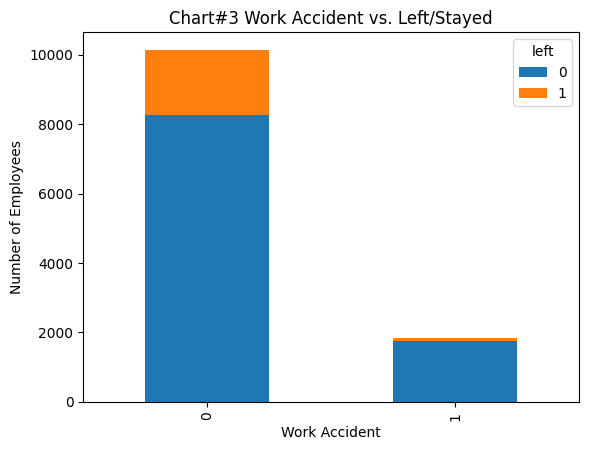

In [45]:
# Work Accident
accident_counts = df1.groupby(['work_accident', 'left']).size().unstack().fillna(0)
accident_counts.plot(kind='bar', stacked=True)
plt.title('Chart#3 Work Accident vs. Left/Stayed')
plt.xlabel('Work Accident')
plt.ylabel('Number of Employees')
plt.show()

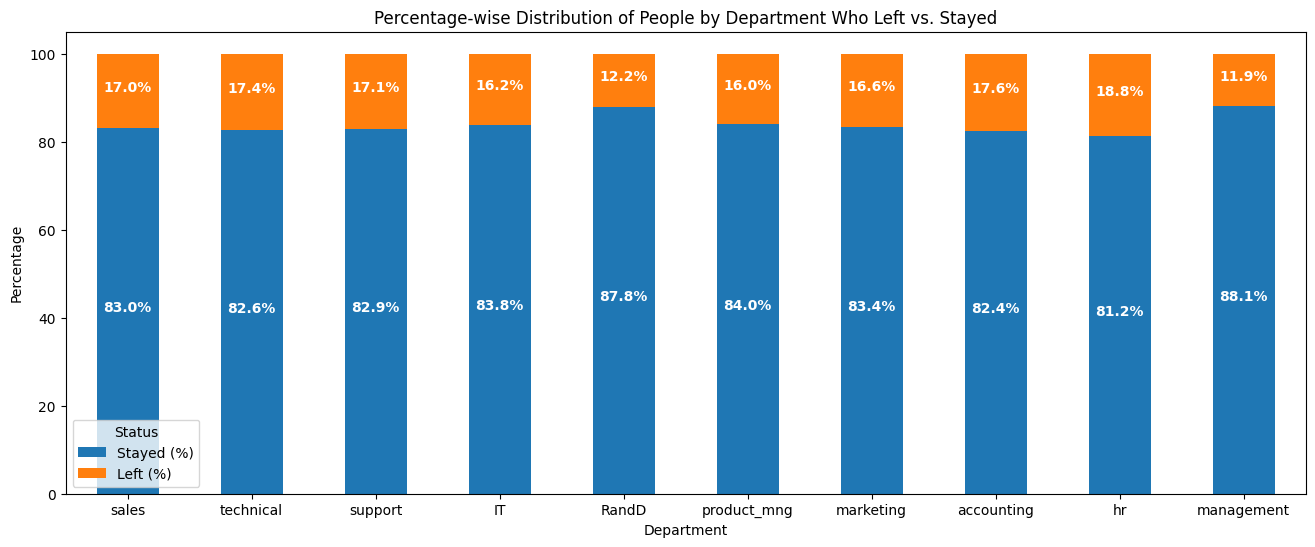

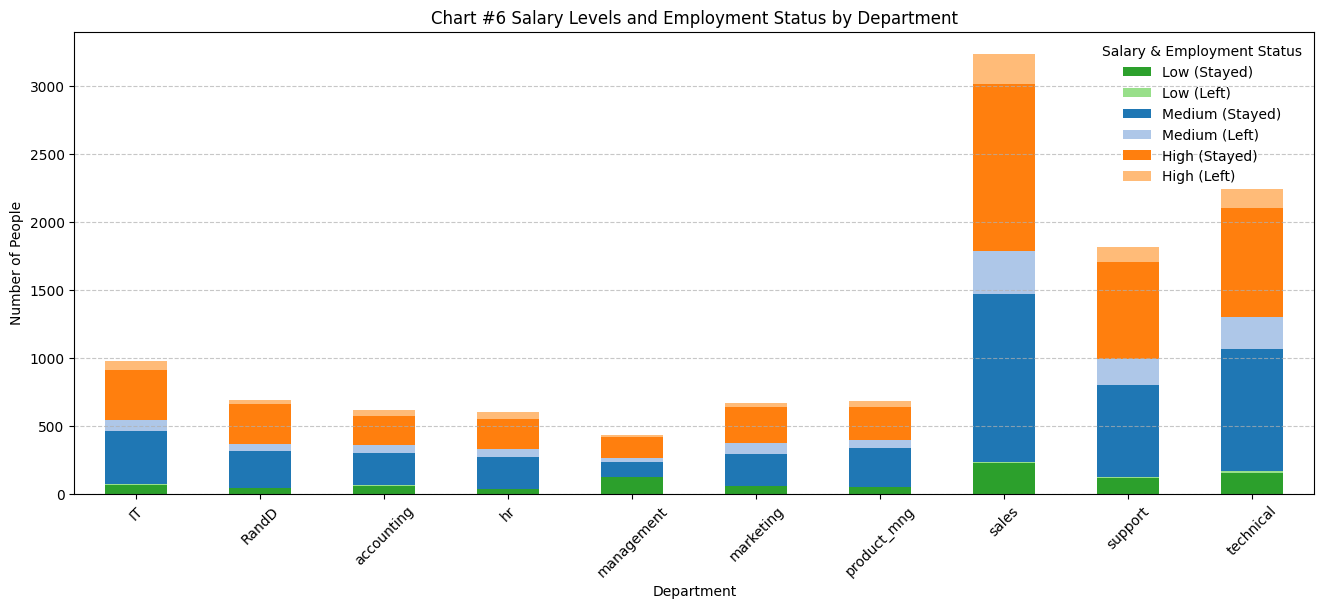

In [46]:
# Calculate total counts for each department
department_counts = df1['department'].value_counts()

# Calculate counts for each department who left and who stayed
department_left_counts = df1[df1['left'] == 1]['department'].value_counts()
department_stayed_counts = df1[df1['left'] == 0]['department'].value_counts()

# Calculate percentages within each department
department_left_percentage = (department_left_counts / department_counts * 100).reindex(department_counts.index).fillna(0)
department_stayed_percentage = (department_stayed_counts / department_counts * 100).reindex(department_counts.index).fillna(0)

# Combine into a DataFrame
percentage_df = pd.DataFrame({
        'Stayed (%)': department_stayed_percentage,
    'Left (%)': department_left_percentage
})

# Plot the percentage-wise distribution
percentage_df.plot(kind='bar', stacked=True, figsize=(16, 6))
plt.title('Percentage-wise Distribution of People by Department Who Left vs. Stayed')
plt.xlabel('Department')
plt.ylabel('Percentage')
plt.legend(title='Status')
plt.xticks(rotation=0)

# Adding percentage labels on the bars
for i in range(percentage_df.shape[0]):
    plt.text(i, percentage_df.iloc[i, 0] / 2, f"{percentage_df.iloc[i, 0]:.1f}%", ha='center', color='white', weight='bold')
    plt.text(i, percentage_df.iloc[i, 0] + (percentage_df.iloc[i, 1] / 2), f"{percentage_df.iloc[i, 1]:.1f}%", ha='center', color='white', weight='bold')

plt.show()

# Pivot the data for a stacked bar chart
pivot_table = df1.pivot_table(
    index='department',
    columns=['salary', 'left'],
    aggfunc='size',
    fill_value=0
)

# Custom colors for each category (darker for stayed, lighter for left)
colors = {
    ('low', 0): '#1f77b4',  # Dark blue for low salary, stayed
    ('low', 1): '#aec7e8',  # Light blue for low salary, left
    ('medium', 0): '#ff7f0e',  # Dark orange for medium salary, stayed
    ('medium', 1): '#ffbb78',  # Light orange for medium salary, left
    ('high', 0): '#2ca02c',  # Dark green for high salary, stayed
    ('high', 1): '#98df8a'  # Light green for high salary, left
}

# Create a stacked bar chart
fig, ax = plt.subplots(figsize=(16, 6))

pivot_table.plot(
    kind='bar',
    stacked=True,
    color=[colors[col] for col in pivot_table.columns],
    ax=ax
)

plt.title('Chart #6 Salary Levels and Employment Status by Department')
plt.xlabel('Department')
plt.ylabel('Number of People')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Salary & Employment Status', loc='upper right', frameon=False, labels=[
    'Low (Stayed)', 'Low (Left)',
    'Medium (Stayed)', 'Medium (Left)',
    'High (Stayed)', 'High (Left)'
])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

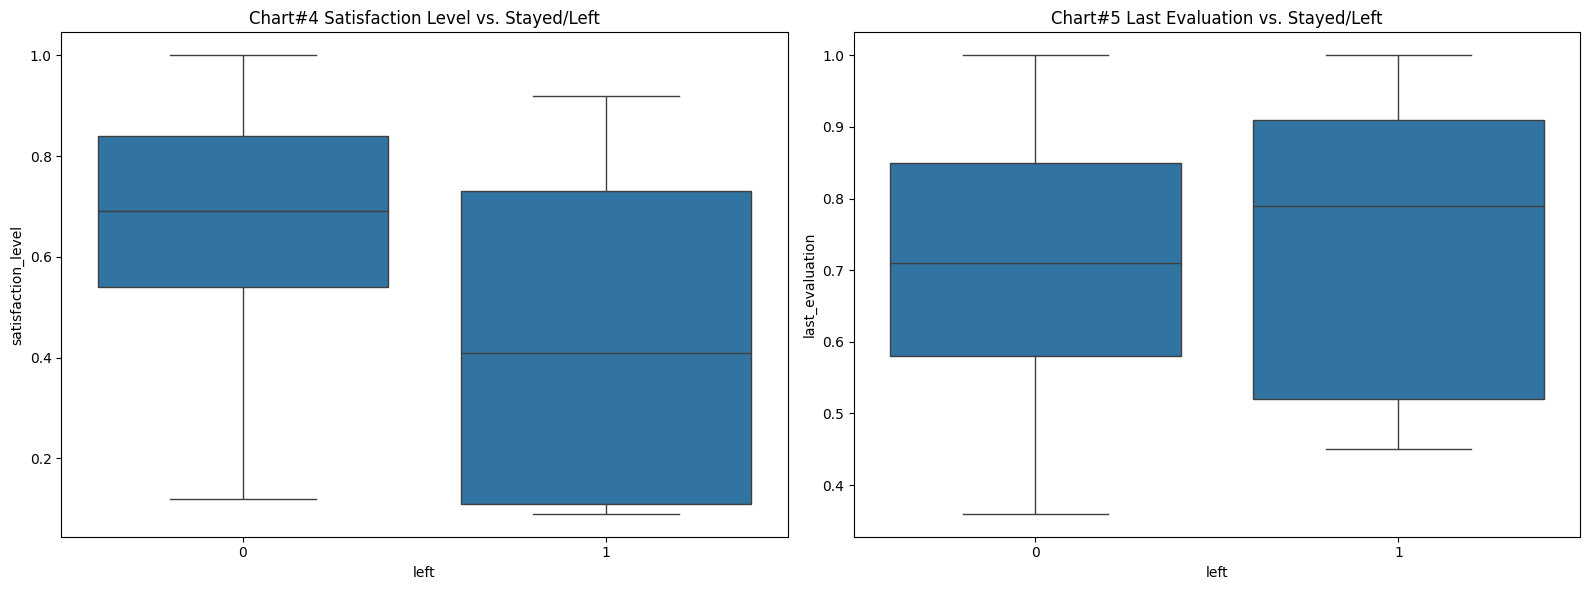

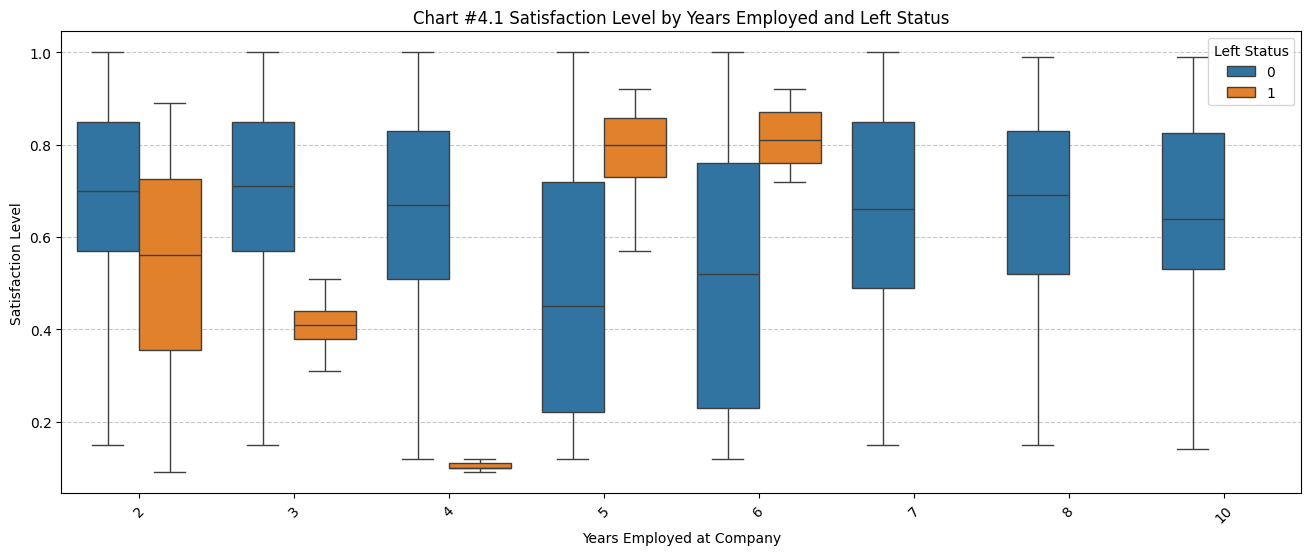

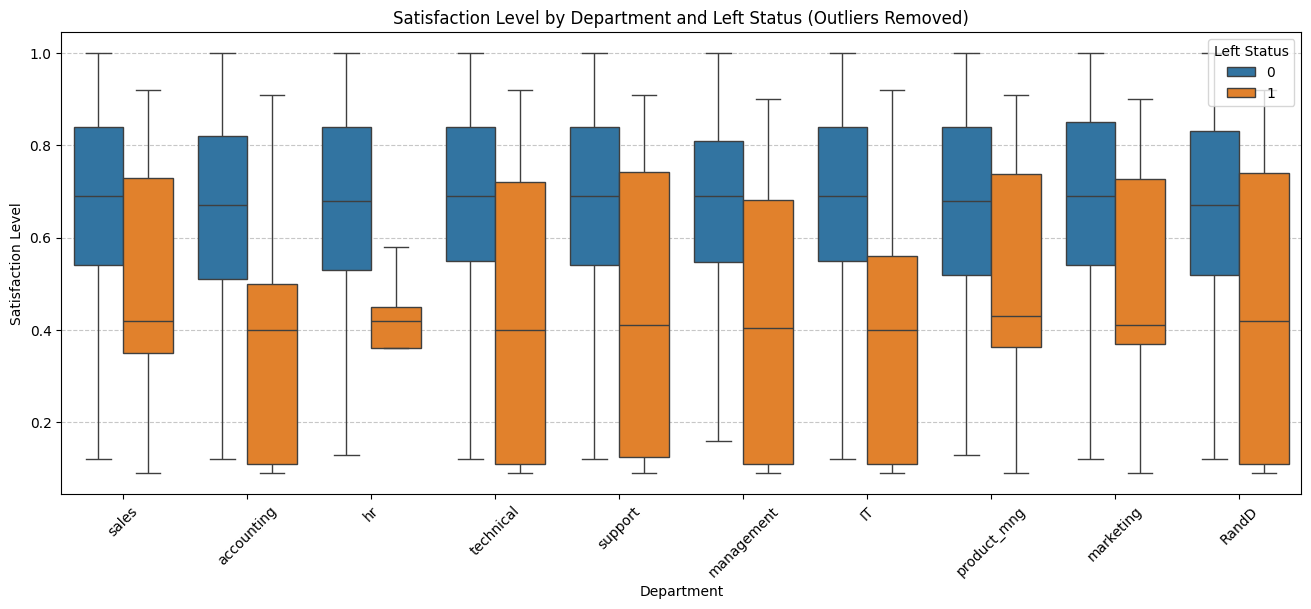

In [47]:
# Create a plot as needed
plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x='left', y='satisfaction_level', data=df1)
plt.title('Chart#4 Satisfaction Level vs. Stayed/Left')

plt.subplot(1, 2, 2)
sns.boxplot(x='left', y='last_evaluation', data=df1)
plt.title('Chart#5 Last Evaluation vs. Stayed/Left')

plt.tight_layout()
plt.show()

# Plotting the box plots for satisfaction_level by years employed
plt.figure(figsize=(16, 6))

# Box plot for each year of employment
sns.boxplot(
    x='time_spend_company', 
    y='satisfaction_level', 
    hue='left', 
    data=df1, 
    showfliers=False  # Remove outliers for a clearer view
)

plt.title('Chart #4.1 Satisfaction Level by Years Employed and Left Status')
plt.xlabel('Years Employed at Company')
plt.ylabel('Satisfaction Level')
plt.legend(title='Left Status', loc='upper right')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Plotting the box plots
plt.figure(figsize=(16, 6))

# Box plot for each department with outliers removed
sns.boxplot(
    x='department', 
    y='satisfaction_level', 
    hue='left', 
    data=df1, 
    showfliers=False  # Remove outliers
)

plt.title('Satisfaction Level by Department and Left Status (Outliers Removed)')
plt.xlabel('Department')
plt.ylabel('Satisfaction Level')
plt.legend(title='Left Status', loc='upper right')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



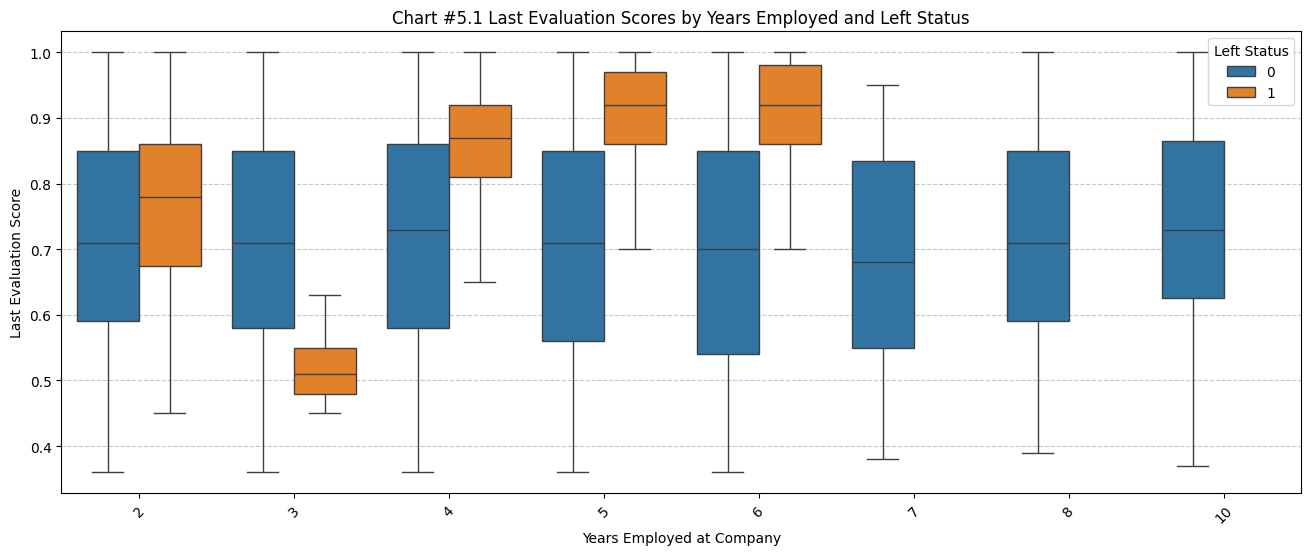

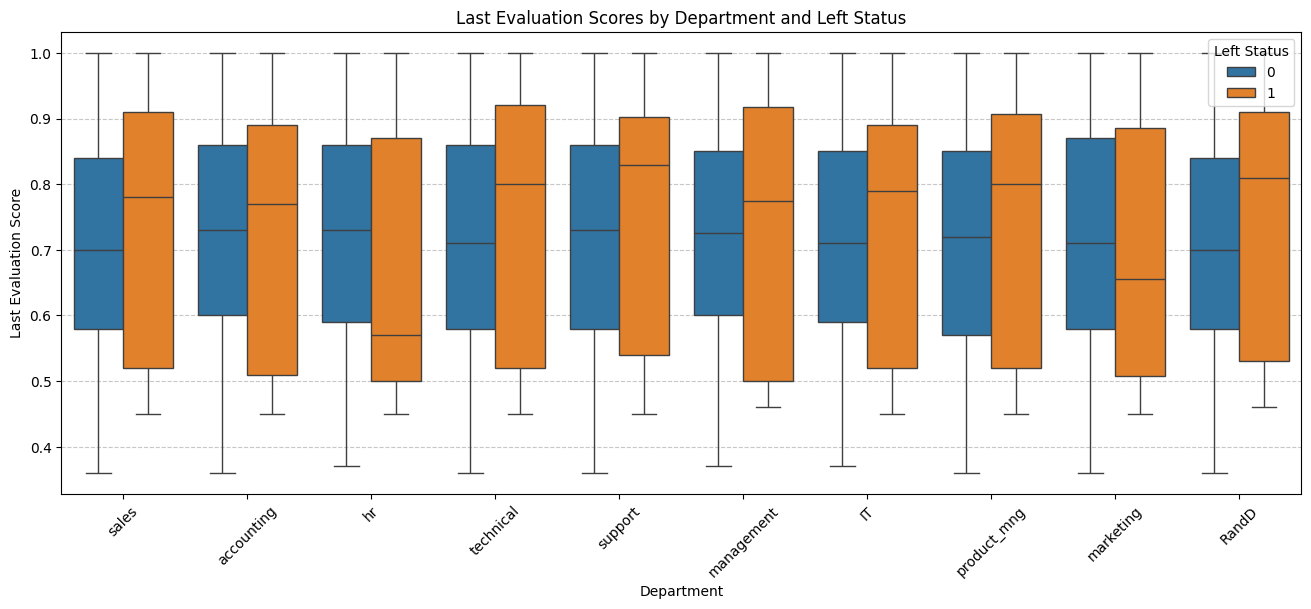

In [48]:
# Plotting the box plots for last_evaluation by years employed
plt.figure(figsize=((16, 6)))

# Box plot for each year of employment
sns.boxplot(
    x='time_spend_company', 
    y='last_evaluation', 
    hue='left', 
    data=df1, 
    showfliers=False  # Remove outliers for a clearer view
)
plt.title('Chart #5.1 Last Evaluation Scores by Years Employed and Left Status')
plt.xlabel('Years Employed at Company')
plt.ylabel('Last Evaluation Score')
plt.legend(title='Left Status', loc='upper right')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Plotting the box plots
plt.figure(figsize=(16, 6))
sns.boxplot(
    x='department', 
    y='last_evaluation', 
    hue='left', 
    data=df1, 
)
plt.title('Last Evaluation Scores by Department and Left Status')
plt.xlabel('Department')
plt.ylabel('Last Evaluation Score')
plt.legend(title='Left Status', loc='upper right')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

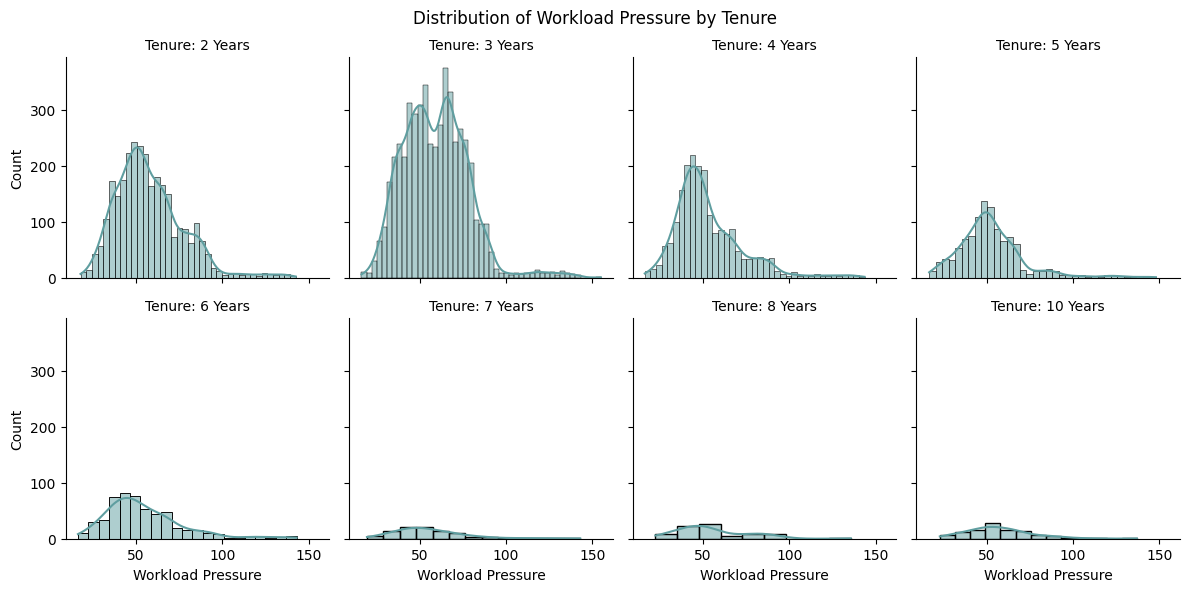

/var/folders/14/bh3qw6yj6g3f5z7sdk9kyb6w0000gn/T/ipykernel_28266/1434533296.py:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.lineplot(x='time_spend_company', y='workload_pressure', data=df1, ci='sd', marker='o')


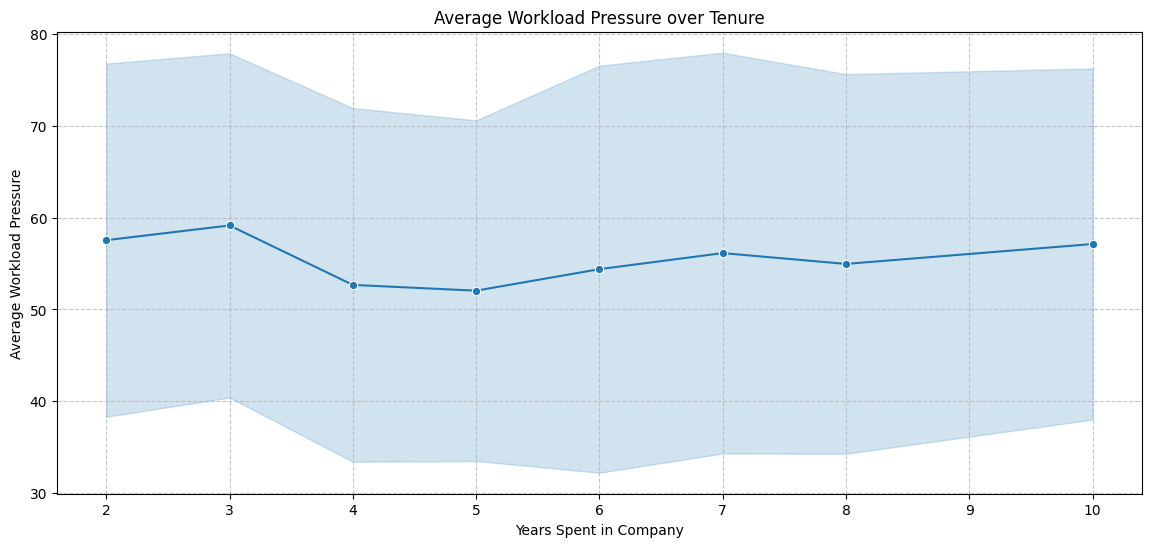

/var/folders/14/bh3qw6yj6g3f5z7sdk9kyb6w0000gn/T/ipykernel_28266/1434533296.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='department', y='workload_pressure', data=df1, palette='Set3')


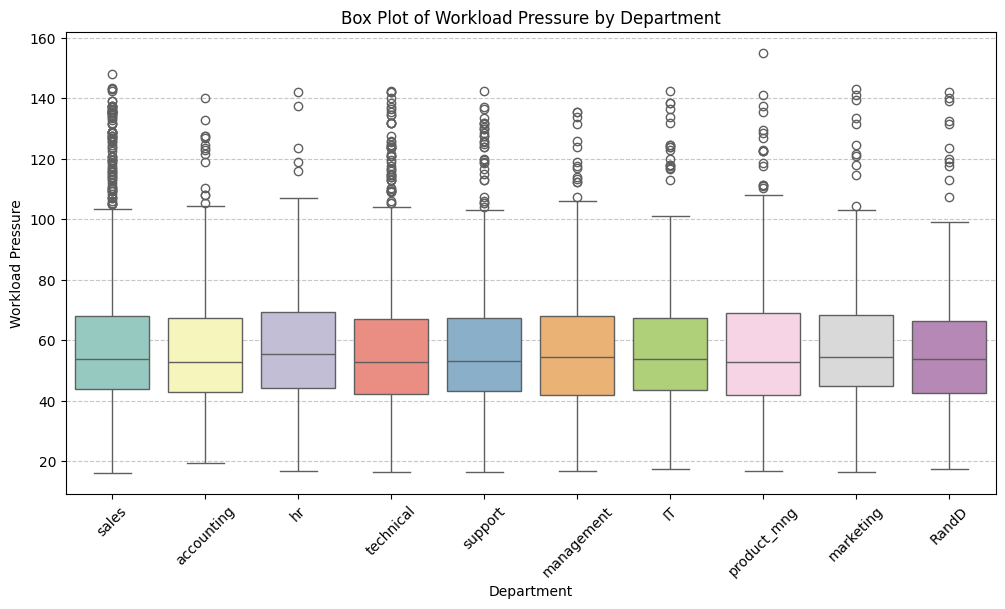

In [49]:
g = sns.FacetGrid(df1, col='time_spend_company', col_wrap=4, height=3)
g.map(sns.histplot, 'workload_pressure', kde=True, color='cadetblue')
g.set_titles('Tenure: {col_name} Years')
g.set_axis_labels('Workload Pressure', 'Count')
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Distribution of Workload Pressure by Tenure')
plt.show()



plt.figure(figsize=(14, 6))
sns.lineplot(x='time_spend_company', y='workload_pressure', data=df1, ci='sd', marker='o')
plt.title('Average Workload Pressure over Tenure')
plt.xlabel('Years Spent in Company')
plt.ylabel('Average Workload Pressure')
plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='department', y='workload_pressure', data=df1, palette='Set3')
plt.title('Box Plot of Workload Pressure by Department')
plt.xlabel('Department')
plt.ylabel('Workload Pressure')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

<Figure size 1200x600 with 0 Axes>

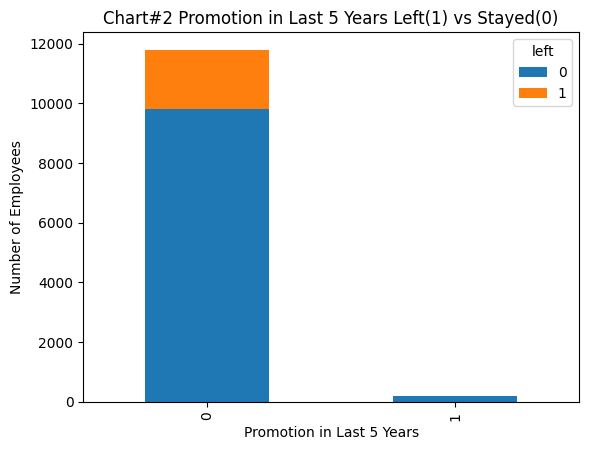

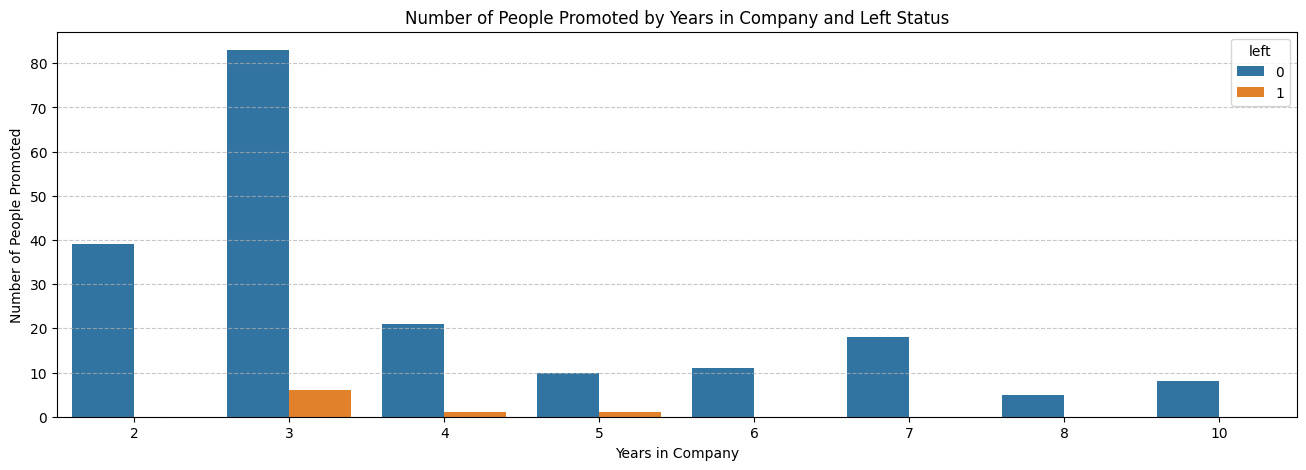

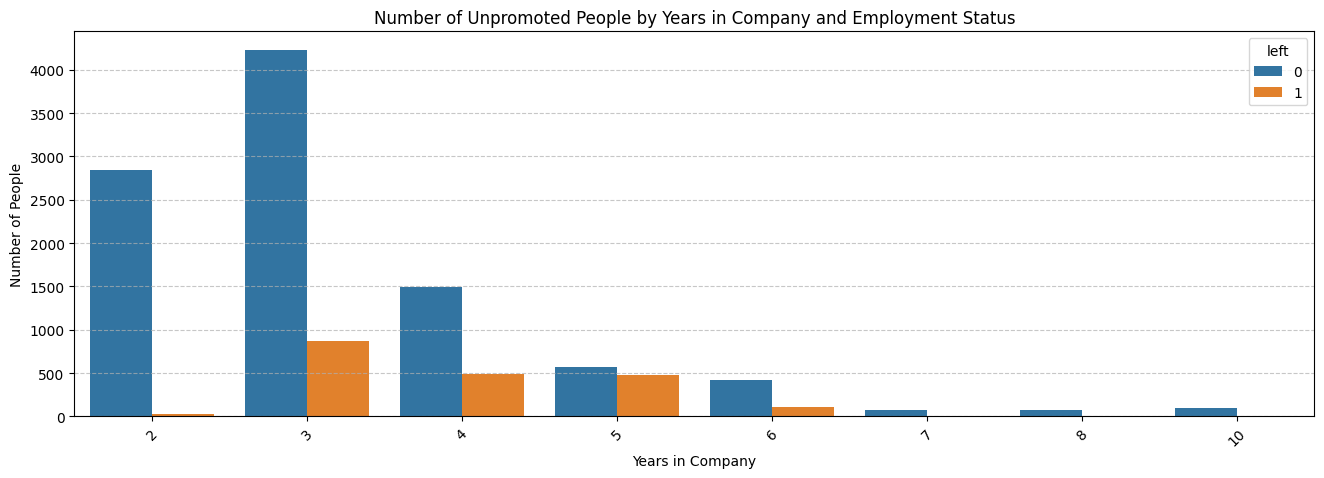

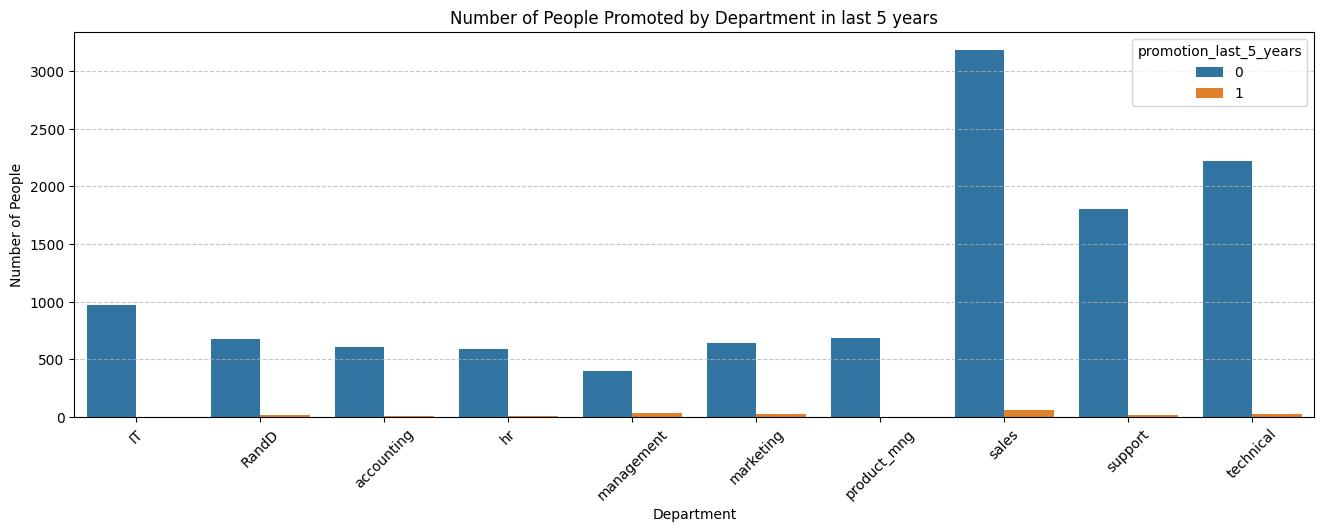

In [50]:

plt.figure(figsize=(12, 6))

# Promotion Last 5 Years
promotion_counts = df1.groupby(['promotion_last_5_years', 'left']).size().unstack().fillna(0)
promotion_counts.plot(kind='bar', stacked=True)
plt.title('Chart#2 Promotion in Last 5 Years Left(1) vs Stayed(0)')
plt.xlabel('Promotion in Last 5 Years')
plt.ylabel('Number of Employees')
plt.show()

# Filter for people who got promotions
promotions_data = df1[df1['promotion_last_5_years'] == 1]

# Calculate the number of people who got promotions by years in company and left status
promotions_grouped = promotions_data.groupby(['time_spend_company', 'left']).size().reset_index(name='count')

# Plotting the grouped bar chart
plt.figure(figsize=(16, 5))

sns.barplot(
    x='time_spend_company', 
    y='count', 
    hue='left', 
    data=promotions_grouped, 
)

plt.title('Number of People Promoted by Years in Company and Left Status')
plt.xlabel('Years in Company')
plt.ylabel('Number of People Promoted')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#Filter data for unpromoted people
unpromoted = df1[df1['promotion_last_5_years'] == 0]

# Group data by years in company and left status
unpromoted_counts = unpromoted.groupby(['time_spend_company', 'left']).size().reset_index(name='count')

# Plotting the grouped bar chart
plt.figure(figsize=(16, 5))

sns.barplot(
    x='time_spend_company', 
    y='count', 
    hue='left', 
    data=unpromoted_counts, 
)

plt.title('Number of Unpromoted People by Years in Company and Employment Status')
plt.xlabel('Years in Company')
plt.ylabel('Number of People')
plt.xticks(rotation=45) 

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Group data by department and promotion status
promotion_counts = df1.groupby(['department', 'promotion_last_5_years']).size().reset_index(name='count')

# Plotting the grouped bar chart
plt.figure(figsize=(16, 5))

ax = sns.barplot(
    x='department', 
    y='count', 
    hue='promotion_last_5_years', 
    data=promotion_counts, 
)

plt.title('Number of People Promoted by Department in last 5 years')
plt.xlabel('Department')
plt.ylabel('Number of People')
plt.xticks(rotation=45) 


plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

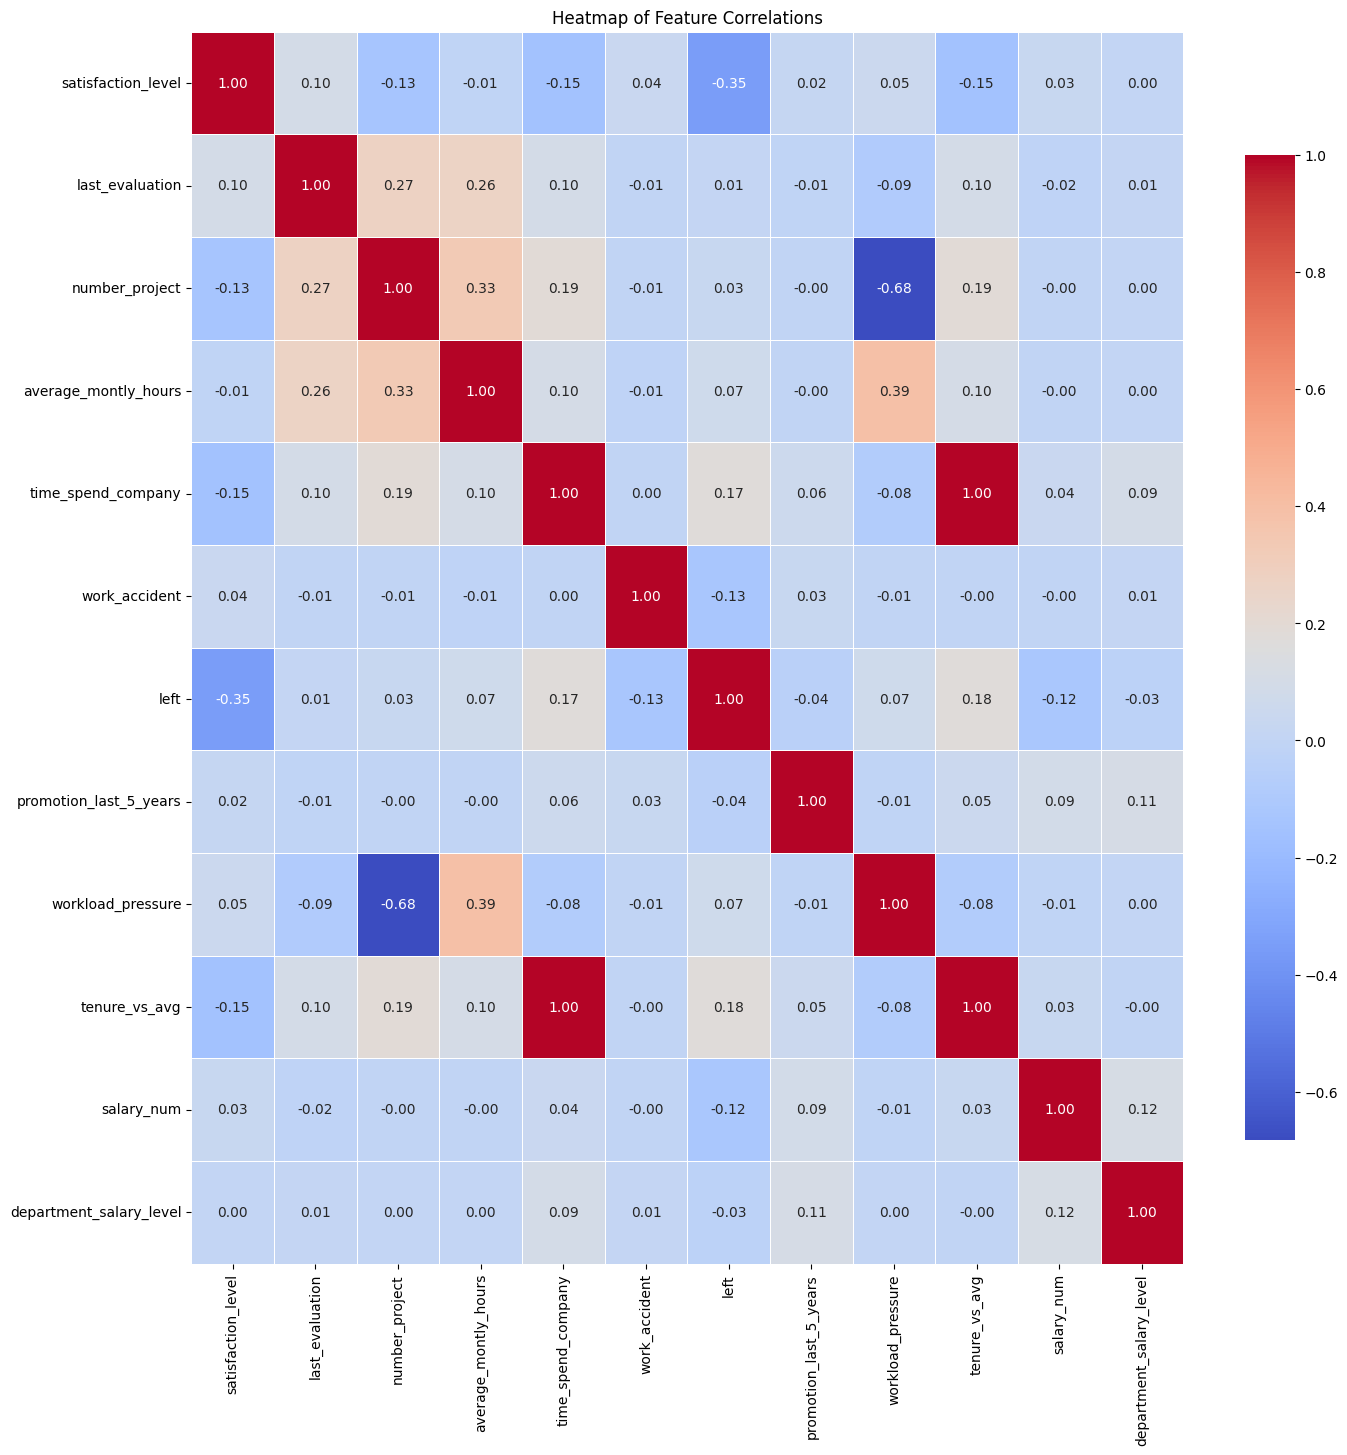

In [54]:
# Select only numeric columns
numeric_df = df1.select_dtypes(include=[np.number])

# Compute the correlation matrix
corr_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(16, 16))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title('Heatmap of Feature Correlations')
plt.show()  

### Conclusion

- **Satisfaction Level** stands out as the most critical factor influencing employee turnover, with a significant negative correlation with leaving. This indicates that improving employee satisfaction could be a key strategy for reducing turnover.
- Other factors like **time spent at the company** and **workload pressure** have moderate to weak correlations, indicating they play a role but are not as influential as satisfaction level.
- The heatmap suggests that while several factors are related to employee turnover, **satisfaction level** is the most important predictor, and efforts to enhance job satisfaction could be crucial in retaining employees.
